<a href="https://colab.research.google.com/github/wwchiam/DeepFakeDetect/blob/main/Deepfake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Getting the download script ready



In [1]:
!nvidia-smi

Sun Dec  8 12:54:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import cv2
import os
from google.colab import drive

In [3]:
# Define the Google Drive folder path
gdrive_folder_path = '/content/drive/My Drive/DeepFakeDetection'
os.makedirs(gdrive_folder_path, exist_ok=True)

In [4]:
!wget https://kaldir.vc.in.tum.de/faceforensics_download_v4.py -O faceforensics_download_v4.py

--2024-12-08 12:54:05--  https://kaldir.vc.in.tum.de/faceforensics_download_v4.py
Resolving kaldir.vc.in.tum.de (kaldir.vc.in.tum.de)... 131.159.98.128
Connecting to kaldir.vc.in.tum.de (kaldir.vc.in.tum.de)|131.159.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10727 (10K) [text/x-python]
Saving to: ‘faceforensics_download_v4.py’

faceforensics_downl 100%[===================>]  10.48K  --.-KB/s    in 0.001s  

2024-12-08 12:54:05 (9.73 MB/s) - ‘faceforensics_download_v4.py’ saved [10727/10727]



In [5]:
# Open the script
with open('faceforensics_download_v4.py', 'r') as file:
    script = file.read()

# Replace the key press prompt with a simple print statement
script = script.replace("input('')", "print('Agreement confirmed automatically in Colab.')")

# Save the modified script
with open('faceforensics_download_v4.py', 'w') as file:
    file.write(script)


In [6]:
!ls -l faceforensics_download_v4.py


-rw-r--r-- 1 root root 10770 Dec  8 12:54 faceforensics_download_v4.py


In [7]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.2 MB/s eta 0:00:00


In [8]:
from mtcnn import MTCNN

# Step 2: Dataset Download

Datasets for model training
*   Deepfake Detection Dataset
*   Face Forensic

Dataset for cross validation


*   Celeb DF





## Dataset 1: Deepfake Detection



*   Original: 363 videos (capture 10 frames)
*   Deepfake: 1000 videos (capture 10 frames)


### Deepfake: Original Download

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d DeepFakeDetection_original -c raw -t videos --server EU2

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/original_sequences/actors/raw/videos
100% 363/363 [01:23<00:00,  4.33it/s]


#### Extract Frames

In [ ]:
import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/original_sequences/actors/raw/videos'
output_dir = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Error opening video: 02__hugging_happy.mp4
Finished processing video: 17__outside_talking_still_laughing.mp4
Error opening video: 20__walking_and_outside_surprised.mp4
Error opening video: 01__podium_speech_happy.mp4
Error opening video: 24__walking_outside_cafe_disgusted.mp4
Error opening video: 13__walking_outside_cafe_disgusted.mp4
Error opening video: 20__walking_down_indoor_hall_disgust.mp4
Error opening video: 18__walk_down_hall_angry.mp4
Error opening video: 23__hugging_happy.mp4
Error opening video: 08__outside_talking_pan_laughing.mp4
Error opening video: 05__podium_speech_happy.mp4
Error opening video: 12__exit_phone_room.mp4
Error opening video: 05__talking_against_wall.mp4
Error opening video: 05__hugging_happy.mp4
Error opening video: 27__walking_and_outside_surprised.mp4
Error opening video: 13__talking_angry_couch.mp4
Error opening video: 10__walking_down_street_outside_angry.mp4
Error opening video: 15__hugging_happy.mp4
Error opening video: 06__exit_phone_room.mp4
Erro

#### Checkpoint for processing

In [ ]:
import os
import shutil

# Directory where the output files (frames) are saved
output_dir = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection'

# Directory where the original videos are saved
video_dir = '/content/dataset/original_sequences/actors/raw/videos'

# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")

Distinct base files count: 363
Total files count: 3630
Processed video placeholders created in: /content/dataset/original_sequences/actors/raw/videos


### Deepfake: Deepfake Download

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d DeepFakeDetection -c raw -t videos --server EU2 --n 1000


By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/manipulated_sequences/DeepFakeDetection/raw/videos
 69% 687/1000 [20:12<5:04:01, 58.28s/it]

#### Extract Frames

In [ ]:
import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/DeepFakeDetection/raw/videos/'
output_dir = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Error opening video: 26_13__secret_conversation__XRS5W2NC.mp4
Error opening video: 20_26__talking_angry_couch__34DJQS3E.mp4
Error opening video: 26_01__secret_conversation__BTVMWLG6.mp4
Error opening video: 06_04__walking_outside_cafe_disgusted__ZK95PQDE.mp4
Error opening video: 11_13__talking_angry_couch__61T622EK.mp4
Error opening video: 07_20__outside_talking_pan_laughing__KV6Q7D6C.mp4
Error opening video: 26_12__outside_talking_still_laughing__FWFQ5YB8.mp4
Error opening video: 11_21__kitchen_still__N6YQW2AP.mp4
Error opening video: 18_25__outside_talking_pan_laughing__AUC0HY5T.mp4
Error opening video: 04_13__walking_down_street_outside_angry__00T3UYOR.mp4
Error opening video: 27_01__talking_against_wall__ZYCZ30C0.mp4
Error opening video: 06_26__kitchen_pan__L5BVR5L9.mp4
Error opening video: 13_14__hugging_happy__KMQ3AW6A.mp4
Error opening video: 06_15__outside_talking_still_laughing__QRCD27P8.mp4
Error opening video: 01_27__walking_outside_cafe_disgusted__ZYCZ30C0.mp4
Error opening

#### Checkpoint for processing

In [ ]:
import os
import shutil


# Directory where the output files (frames) are saved
output_dir = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/'

# Directory where the original videos are saved
video_dir ='/content/dataset/manipulated_sequences/DeepFakeDetection/raw/videos/'

# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")

Distinct base files count: 661
Total files count: 6610
Processed video placeholders created in: /content/dataset/manipulated_sequences/DeepFakeDetection/raw/videos/


##Dataset 2: Face Forensic+

*   Original: 1000 images from 1000 videos
*   Deepfake:

*   Face2Face: 200 images from first 200 videos
*   FaceShifter: 200 images from first 200 videos
*   FaceSwap: 200 images from first 200 videos
*   NeuralTextures: 200 images from first 200 videos
*   Deepfakes: 2200 images from first 200 videos




### Face Forensic Original

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d original -c raw -t videos --server EU2

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/original_sequences/youtube/raw/videos
100% 1000/1000 [00:00<00:00, 2379.34it/s]


#### Extract frames

In [ ]:
import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/original_sequences/youtube/raw/videos'
output_dir = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Error opening video: 453.mp4
Error opening video: 854.mp4
Error opening video: 659.mp4
Error opening video: 840.mp4
Error opening video: 649.mp4
Error opening video: 016.mp4
Error opening video: 956.mp4
Error opening video: 769.mp4
Error opening video: 857.mp4
Error opening video: 892.mp4
Error opening video: 797.mp4
Error opening video: 620.mp4
Error opening video: 187.mp4
Error opening video: 509.mp4
Error opening video: 581.mp4
Error opening video: 557.mp4
Error opening video: 913.mp4
Error opening video: 575.mp4
Error opening video: 598.mp4
Error opening video: 116.mp4
Error opening video: 366.mp4
Error opening video: 010.mp4
Error opening video: 809.mp4
Error opening video: 081.mp4
Error opening video: 090.mp4
Error opening video: 230.mp4
Error opening video: 173.mp4
Error opening video: 580.mp4
Error opening video: 025.mp4
Error opening video: 973.mp4
Error opening video: 270.mp4
Error opening video: 379.mp4
Error opening video: 933.mp4
Error opening video: 271.mp4
Error opening 

In [ ]:

# Directory where the output files (frames) are saved
output_dir = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube/'
# Directory where the original videos are saved
video_dir = '/content/dataset/original_sequences/youtube/raw/videos/'


# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")


Distinct base files count: 999
Total files count: 9990
Processed video placeholders created in: /content/dataset/original_sequences/youtube/raw/videos/


### Face Forensic Deepfake

#### Face2Face

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d Face2Face -c raw -t videos --server EU2

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/manipulated_sequences/Face2Face/raw/videos
100% 1000/1000 [44:08<00:00,  2.65s/it]


In [ ]:
import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/Face2Face/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Finished processing video: 372_413.mp4
Error opening video: 304_300.mp4
Error opening video: 387_311.mp4
Error opening video: 794_779.mp4
Finished processing video: 749_659.mp4
Error opening video: 925_933.mp4
Error opening video: 159_175.mp4
Error opening video: 252_266.mp4
Finished processing video: 941_940.mp4
Error opening video: 637_427.mp4
Finished processing video: 084_042.mp4
Error opening video: 672_720.mp4
Finished processing video: 509_525.mp4
Finished processing video: 240_290.mp4
Finished processing video: 505_600.mp4
Error opening video: 614_616.mp4
Error opening video: 103_082.mp4
Error opening video: 812_821.mp4
Finished processing video: 095_053.mp4
Finished processing video: 930_763.mp4
Error opening video: 664_668.mp4
Finished processing video: 872_873.mp4
Error opening video: 268_269.mp4
Error opening video: 479_706.mp4
Finished processing video: 608_675.mp4
Error opening video: 221_206.mp4
Error opening video: 327_329.mp4
Error opening video: 526_436.mp4
Error open

In [ ]:

# Directory where the output files (frames) are saved
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face/'
# Directory where the original videos are saved
video_dir = '/content/dataset/manipulated_sequences/Face2Face/raw/videos/'


# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")


Distinct base files count: 1000
Total files count: 10000
Processed video placeholders created in: /content/dataset/manipulated_sequences/Face2Face/raw/videos/


####Faceshifter

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d FaceShifter -c raw -t videos --server EU2

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/manipulated_sequences/FaceShifter/raw/videos
100% 1000/1000 [1:50:58<00:00,  6.66s/it]


In [ ]:
import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/FaceShifter/raw/videos/'
output_dir = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/'


# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Finished processing video: 372_413.mp4
Finished processing video: 304_300.mp4
Finished processing video: 387_311.mp4
Error opening video: 794_779.mp4
Finished processing video: 749_659.mp4
Error opening video: 925_933.mp4
Error opening video: 159_175.mp4
Error opening video: 252_266.mp4
Finished processing video: 941_940.mp4
Finished processing video: 637_427.mp4
Finished processing video: 084_042.mp4
Error opening video: 672_720.mp4
Finished processing video: 509_525.mp4
Finished processing video: 240_290.mp4
Finished processing video: 505_600.mp4
Error opening video: 614_616.mp4
Error opening video: 103_082.mp4
Error opening video: 812_821.mp4
Finished processing video: 095_053.mp4
Finished processing video: 930_763.mp4
Error opening video: 664_668.mp4
Finished processing video: 872_873.mp4
Error opening video: 268_269.mp4
Error opening video: 479_706.mp4
Finished processing video: 608_675.mp4
Error opening video: 221_206.mp4
Finished processing video: 327_329.mp4
Finished processing

In [ ]:

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/FaceShifter/raw/videos/'
output_dir = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/'


# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")


OSError: [Errno 22] Invalid argument: '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter/'

#### Faceswap

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d FaceSwap -c raw -t videos --server EU2

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/manipulated_sequences/FaceSwap/raw/videos
 87% 871/1000 [1:32:58<29:07, 13.55s/it]

In [ ]:
import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/FaceSwap/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/'


# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/manipulated_sequences/FaceSwap/raw/videos/'

In [ ]:

# Directory where videos are saved
# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/FaceSwap/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/'


# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")


Distinct base files count: 1000
Total files count: 9997
Processed video placeholders created in: /content/dataset/manipulated_sequences/FaceSwap/raw/videos/


#### NeuralTextures

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d NeuralTextures -c raw -t videos --server EU2 --n 450

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/manipulated_sequences/NeuralTextures/raw/videos
100% 450/450 [26:28<00:00,  3.53s/it]


In [ ]:

import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/NeuralTextures/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/'


# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Error opening video: 731_741.mp4
Error opening video: 356_324.mp4
Error opening video: 049_946.mp4
Error opening video: 938_987.mp4
Error opening video: 671_677.mp4
Error opening video: 876_891.mp4
Error opening video: 465_482.mp4
Finished processing video: 790_014.mp4
Finished processing video: 894_848.mp4
Finished processing video: 758_754.mp4
Finished processing video: 014_790.mp4
Error opening video: 339_392.mp4
Error opening video: 683_607.mp4
Error opening video: 698_693.mp4
Error opening video: 124_085.mp4
Error opening video: 054_071.mp4
Finished processing video: 463_464.mp4
Error opening video: 213_083.mp4
Error opening video: 482_465.mp4
Finished processing video: 447_431.mp4
Finished processing video: 563_537.mp4
Finished processing video: 818_820.mp4
Error opening video: 085_124.mp4
Finished processing video: 050_059.mp4
Error opening video: 596_609.mp4
Error opening video: 262_301.mp4
Error opening video: 821_812.mp4
Finished processing video: 681_711.mp4
Error opening vi

In [ ]:

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/NeuralTextures/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures/'

# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")


Distinct base files count: 450
Total files count: 4500
Processed video placeholders created in: /content/dataset/manipulated_sequences/NeuralTextures/raw/videos/


#### Deepfakes

In [ ]:
!python faceforensics_download_v4.py /content/dataset -d Deepfakes -c raw -t videos --server EU2

By pressing any key to continue you confirm that you have agreed to the FaceForensics terms of use as described at:
http://kaldir.vc.in.tum.de/faceforensics/webpage/FaceForensics_TOS.pdf
***
Press any key to continue, or CTRL-C to exit.
Agreement confirmed automatically in Colab.
Output path: /content/dataset/manipulated_sequences/Deepfakes/raw/videos
100% 1000/1000 [44:30<00:00,  2.67s/it]


In [ ]:

import os
import cv2
from mtcnn import MTCNN

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/Deepfakes/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of frames to capture with faces
num_frames_to_capture = 10
frame_skip = 10  # Process every 10th frame

# Initialize MTCNN face detector
detector = MTCNN()

# Function to process a single video and extract frames with faces
def process_video(video_file):
    video_path = os.path.join(video_dir, video_file)
    cap = cv2.VideoCapture(video_path)

    # Check if video is opened successfully
    if not cap.isOpened():
        print(f"Error opening video: {video_file}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_with_faces = 0  # Counter to track number of frames with faces

    # Loop through frame positions with sampling
    for frame_index in range(0, total_frames, frame_skip):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()

        if ret:
            # Detect faces in the frame
            faces = detector.detect_faces(frame)
            if faces:  # Save the frame only if a face is detected
                frame_file = os.path.join(output_dir, f'{os.path.splitext(video_file)[0]}_frame{frames_with_faces + 1}.jpg')
                cv2.imwrite(frame_file, frame)
                frames_with_faces += 1

            # Stop if we have enough frames with faces
            if frames_with_faces >= num_frames_to_capture:
                break

    if frames_with_faces < num_frames_to_capture:
        print(f"Only {frames_with_faces} frames with faces detected in video: {video_file}")

    cap.release()
    print(f"Finished processing video: {video_file}")

# Main function to process all videos sequentially
def main():
    # Get a list of all video files
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]

    # Process videos one by one
    for video_file in video_files:
        process_video(video_file)

    print("Frames extraction with face detection completed.")

if __name__ == "__main__":
    main()


Error opening video: 731_741.mp4
Error opening video: 372_413.mp4
Finished processing video: 804_738.mp4
Error opening video: 356_324.mp4
Error opening video: 049_946.mp4
Finished processing video: 104_126.mp4
Error opening video: 293_296.mp4
Error opening video: 751_752.mp4
Finished processing video: 234_187.mp4
Finished processing video: 190_176.mp4
Error opening video: 409_382.mp4
Error opening video: 938_987.mp4
Finished processing video: 073_024.mp4
Error opening video: 671_677.mp4
Finished processing video: 492_325.mp4
Error opening video: 680_486.mp4
Finished processing video: 053_095.mp4
Error opening video: 876_891.mp4
Error opening video: 465_482.mp4
Error opening video: 220_219.mp4
Finished processing video: 922_898.mp4
Error opening video: 790_014.mp4
Error opening video: 366_473.mp4
Error opening video: 894_848.mp4
Finished processing video: 111_094.mp4
Error opening video: 758_754.mp4
Finished processing video: 336_338.mp4
Finished processing video: 593_577.mp4
Finished p

In [ ]:

# Directory where videos are saved
video_dir = '/content/dataset/manipulated_sequences/Deepfakes/raw/videos/'
output_dir =  '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes/'

# List all files in the output directory
file_names = os.listdir(output_dir)

# Set to hold distinct base names (without _frame)
distinct_base_names = set()

# Loop through all files and extract the base name
for file_name in file_names:
    # Remove the '_frame' part and anything following it
    base_name = file_name.split('_frame')[0]  # Split on '_frame' and take the first part

    # Add the base name to the set to ensure uniqueness
    distinct_base_names.add(base_name)

# Copy the files back to the original video directory with .mp4 extension
for base_name in distinct_base_names:
    processed_video_path = os.path.join(video_dir, f'{base_name}.mp4')

    # Create the necessary directories if they don't exist
    os.makedirs(os.path.dirname(processed_video_path), exist_ok=True)

    # Create an empty file as a placeholder
    with open(processed_video_path, 'w') as f:
        pass  # Create a blank .mp4 file just to mark it as processed

# Count of distinct base names
distinct_count = len(distinct_base_names)
file_count = len(file_names)

# Print the distinct count and total files count
print(f"Distinct base files count: {distinct_count}")
print(f"Total files count: {file_count}")
print(f"Processed video placeholders created in: {video_dir}")


Distinct base files count: 998
Total files count: 9970
Processed video placeholders created in: /content/dataset/manipulated_sequences/Deepfakes/raw/videos/


## Dataset 3: Celeb df v2

In [ ]:
import gdown

# Google Drive file ID from the shared URL (remove any part before 'd/' and after the file ID)
file_id = '1iLx76wsbi9itnkxSqz9BVBl4ZvnbIazj'
url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/drive/MyDrive/Celeb-DF-v2.zip'

# Download the ZIP file from Google Drive
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1iLx76wsbi9itnkxSqz9BVBl4ZvnbIazj
From (redirected): https://drive.google.com/uc?id=1iLx76wsbi9itnkxSqz9BVBl4ZvnbIazj&confirm=t&uuid=2f10c629-ba71-4d0d-b612-81646c123bde
To: /content/drive/MyDrive/Celeb-DF-v2.zip
100%|██████████| 9.95G/9.95G [01:13<00:00, 136MB/s]


'/content/drive/MyDrive/Celeb-DF-v2.zip'

In [ ]:
import zipfile
import os

# Define the path where the ZIP file is downloaded
zip_file = '/content/drive/MyDrive/Celeb-DF-v2.zip'
extract_dir = '/content/drive/MyDrive/Celeb-DF-v2-extracted'

# Extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/Celeb-DF-v2-extracted


In [ ]:
import os
import random
import cv2
from tqdm import tqdm
from mtcnn import MTCNN

# Initialize MTCNN for face detection
mtcnn = MTCNN()

# Define the directories for real, fake, and YouTube-real videos
extract_dir = '/content/drive/MyDrive/Celeb-DF-v2-extracted'
real_dir = os.path.join(extract_dir, 'Celeb-real')
fake_dir = os.path.join(extract_dir, 'Celeb-synthesis')
youtubereal_dir = os.path.join(extract_dir, 'YouTube-real')

# Output directory for saving frames
output_dir = '/content/drive/MyDrive/DeepFakeDetection/crossvalidation'

# Number of frames to extract per video (2 frames per video)
frames_per_video = 2

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to extract frames from a video
def extract_frames_from_video(video_path, num_frames, label):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Skip video if it has too few frames
    if total_frames < num_frames:
        cap.release()
        return []

    frames_extracted = 0
    frame_numbers = random.sample(range(total_frames), num_frames)  # Random frame indices
    frame_images = []

    while frames_extracted < num_frames:
        ret, frame = cap.read()
        if not ret:
            break

        current_frame_number = int(cap.get(cv2.CAP_PROP_POS_FRAMES))

        if current_frame_number in frame_numbers:
            # Detect faces using MTCNN
            faces = mtcnn.detect_faces(frame)
            if faces:
                for i, face in enumerate(faces):
                    # Extract the bounding box for the face
                    x, y, w, h = face['box']
                    face_crop = frame[y:y+h, x:x+w]

                    # Save the cropped face as a .jpg file, include the label in the filename
                    frame_filename = f"{video_path.split('/')[-1].split('.')[0]}_frame{frames_extracted+1}_{i}_label{label}.jpg"
                    frame_path = os.path.join(output_dir, frame_filename)
                    cv2.imwrite(frame_path, face_crop)  # Save the face crop as JPEG
                    frame_images.append(frame_path)
                    frames_extracted += 1

    cap.release()
    return frame_images

# List all video files in the directories (real, fake, YouTube-real)
video_files = []
video_files.extend([os.path.join(real_dir, f) for f in os.listdir(real_dir) if f.endswith(('.mp4', '.avi', '.mov'))])
video_files.extend([os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if f.endswith(('.mp4', '.avi', '.mov'))])
video_files.extend([os.path.join(youtubereal_dir, f) for f in os.listdir(youtubereal_dir) if f.endswith(('.mp4', '.avi', '.mov'))])

# Loop through all videos and extract frames, but suppress print statements
for video_file in tqdm(video_files, desc="Processing videos", ncols=100, leave=False):
    # Determine the label based on the video directory
    if video_file.startswith(real_dir) or video_file.startswith(youtubereal_dir):
        label = 0  # Real
    elif video_file.startswith(fake_dir):
        label = 1  # Fake
    else:
        continue  # Skip if not in any of the directories

    extract_frames_from_video(video_file, frames_per_video, label)

print("Frame extraction complete!")


Processing videos:  12%|████▌                                  | 765/6529 [08:04<1:03:07,  1.52it/s]

# Step 3: Data Exploration

In [ ]:
from google.colab import drive
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image, ImageChops, ImageEnhance

### Checking Download count and create balance dataset


In [ ]:
# prompt: data exploration

# Declare images path
Ori_DFD = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection'
Ori_youtube = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube'

Fake_DFD = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection'
Fake_Deepfakes = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes'
Fake_Faceswap = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap'
Fake_NeuralTexture = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures'
Fake_FaceShifter = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter'
Fake_Face2Face = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face'

# Function to count files in a directory
def count_files(directory):
  try:
    file_count = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    return file_count
  except FileNotFoundError:
    print(f"Directory not found: {directory}")
    return 0

# Count files in each directory
print(f"Original DFD: {count_files(Ori_DFD)} files")
print(f"Original YouTube: {count_files(Ori_youtube)} files")
print(f"Fake DFD: {count_files(Fake_DFD)} files")
print(f"Fake Deepfakes: {count_files(Fake_Deepfakes)} files")
print(f"Fake Faceswap: {count_files(Fake_Faceswap)} files")
print(f"Fake NeuralTexture: {count_files(Fake_NeuralTexture)} files")
print(f"Fake FaceShifter: {count_files(Fake_FaceShifter)} files")
print(f"Fake Face2Face: {count_files(Fake_Face2Face)} files")


Original DFD: 3630 files
Original YouTube: 9990 files
Fake DFD: 6610 files
Fake Deepfakes: 9970 files
Fake Faceswap: 9997 files
Fake NeuralTexture: 4500 files
Fake FaceShifter: 9998 files
Fake Face2Face: 10000 files


In [ ]:
import os
import random
import pandas as pd

# Define directories for each category
Ori_DFD = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection'
Ori_youtube = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/youtube'

Fake_DFD = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection'
Fake_Deepfakes = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Deepfakes'
Fake_Faceswap = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap'
Fake_NeuralTexture = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/NeuralTextures'
Fake_FaceShifter = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceShifter'
Fake_Face2Face = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/Face2Face'

# Original DFD: 3630 files
# Original YouTube: 9990 files
# Fake DFD: 6610 files
# Fake Deepfakes: 9970 files
# Fake Faceswap: 9997 files
# Fake NeuralTexture: 4500 files
# Fake FaceShifter: 9998 files
# Fake Face2Face: 10000 files


# Directories and sampling rules
sampling_rules = {
    "Ori_DFD": (Ori_DFD, 360, 2, 0),
    "Ori_YouTube": (Ori_youtube, 990, 2, 0),
    "Fake_DFD": (Fake_DFD, 500, 2, 1),
    "Fake_Deepfakes": (Fake_Deepfakes, 700, 2, 1),
    "Fake_Faceswap": (Fake_Faceswap, 800, 2, 1),
    "Fake_NeuralTexture": (Fake_NeuralTexture, 400, 2, 1),
    "Fake_FaceShifter": (Fake_FaceShifter, 800, 2, 1),
    "Fake_Face2Face": (Fake_Face2Face, 800, 2, 1),
}

# Function to collect frames for videos and return a dictionary
def collect_frames(video_folder):
    frames = os.listdir(video_folder)
    frame_dict = {}

    # Group frames by base video name
    for frame in frames:
        base_name = frame.split('_frame')[0]  # Extract the video base name
        if base_name not in frame_dict:
            frame_dict[base_name] = []  # Create a list for each video base name
        frame_dict[base_name].append(os.path.join(video_folder, frame))  # Add the frame path

    return frame_dict

# Function to select videos and their respective frames
def select_videos_and_frames(frames_dict, num_videos, num_frames_per_video, label):
    selected_data = []
    selected_video_names = random.sample(list(frames_dict.keys()), num_videos)

    for video_name in selected_video_names:
        frames = frames_dict[video_name]
        # Randomly select num_frames_per_video frames from the available frames
        selected_frames = random.sample(frames, min(len(frames), num_frames_per_video))
        for frame_path in selected_frames:
            selected_data.append((frame_path, label))  # Use the passed label

    return selected_data

# Create a list to hold all frame paths and their labels
data = []

# Process each category based on sampling rules
for category, (folder_path, num_videos, num_frames, label) in sampling_rules.items():
    print(f"Processing {category}...")
    frames_dict = collect_frames(folder_path)
    data += select_videos_and_frames(frames_dict, num_videos, num_frames, label)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Display the DataFrame
print("Data collection complete. Sample data:")
print(df.head())

# Save the DataFrame to a CSV file
csv_path = '/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v2.csv'
df.to_csv(csv_path, index=False)
print(f"Dataset saved to {csv_path}")


Processing Ori_DFD...
Processing Ori_YouTube...
Processing Fake_DFD...
Processing Fake_Deepfakes...
Processing Fake_NeuralTexture...
Processing Fake_FaceShifter...
Processing Fake_Face2Face...
Data collection complete. Sample data:
                                          image_path  label
0  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
1  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
2  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
3  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
4  /content/drive/MyDrive/DeepFakeDetection/Origi...      0
Dataset saved to /content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v2.csv


In [ ]:
new_csv_path = '/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v2.csv'
df.to_csv(new_csv_path, index=False)
print(f"Dataset saved to {new_csv_path}")

Dataset saved to /content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v2.csv


In [ ]:
with open(new_csv_path, 'r') as file:
    line_count = sum(1 for line in file)

print(f'Total number of lines: {line_count}')

Total number of lines: 10701


## Apply Augmentation

In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm
import pandas as pd

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 38.5 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
# Augmentation pipelines for differential augmentation
augmentations1 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=20, p=0.5),
    A.GaussNoise(p=0.2),
    A.RandomGamma(p=0.2),
])

augmentations2 = A.Compose([
    A.VerticalFlip(p=0.3),  # Added vertical flip for more variety
    A.RandomBrightnessContrast(p=0.3),  # Increased contrast probability
    A.Rotate(limit=45, p=0.4),  # Wider rotation
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.6),
    A.GaussNoise(p=0.3),
    A.RandomGamma(p=0.3),
])

# augmentations3 = A.Compose([
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
#     A.Rotate(limit=15, p=0.7),
#     A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=10, p=0.5),
#     A.GaussNoise(p=0.1),
#     A.RandomGamma(p=0.4),
# ])

In [ ]:
import os
import cv2
import pandas as pd
from tqdm import tqdm

# Function to augment and save images
def augment_and_save_diff(image_path, label, output_dir, augmentation_pipes):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return []

    augmented_images = []

    # Apply each augmentation pipeline to the image
    for i, aug_pipeline in enumerate(augmentation_pipes):
        try:
            augmented = aug_pipeline(image=image)
            augmented_image = augmented['image']

            # Generate a unique filename for the augmented image
            image_name = os.path.splitext(os.path.basename(image_path))[0]
            augmented_image_name = f"{image_name}_aug_{i}.jpg"

            # Save the augmented image
            augmented_image_path = os.path.join(output_dir, augmented_image_name)
            cv2.imwrite(augmented_image_path, augmented_image)

            # Collect the augmented image path and label
            augmented_images.append((augmented_image_path, label))
        except Exception as e:
            print(f"Error during augmentation for {image_path} with pipeline {i}: {e}")

    return augmented_images

# Define augmentation pipelines
# Replace with valid Albumentations pipelines
augmentation_pipes = [augmentations1, augmentations2]

# Output directory for augmented images
augmented_dir = '/content/drive/MyDrive/DeepFakeDetection/augmented_frames'
os.makedirs(augmented_dir, exist_ok=True)

# Filter real images
real_images = df[df['label'] == 0]

# Apply augmentation and save results
augmented_data = []
for idx, row in tqdm(real_images.iterrows(), total=real_images.shape[0], desc="Augmenting Images"):
    try:
        image_path = row['image_path']
        label = row['label']

        # Augment and save the image
        augmented_images = augment_and_save_diff(image_path, label, augmented_dir, augmentation_pipes)

        # Append augmented data to the list
        augmented_data.extend(augmented_images)
    except Exception as e:
        print(f"Error processing row {idx}: {e}")

# Convert augmented data to a DataFrame
aug_df = pd.DataFrame(augmented_data, columns=['image_path', 'label'])

# Save the augmented DataFrame
augmented_csv_path = '/content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v3.csv'
aug_df.to_csv(augmented_csv_path, index=False)

print(f"Augmented data saved to {augmented_csv_path}")


Augmenting Images: 100%|██████████| 2700/2700 [43:55<00:00,  1.02it/s]

Augmented data saved to /content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v3.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v2.csv')
aug_df = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v3.csv')
# aug_df = pd.DataFrame(augmented_data, columns=['image_path', 'label'])


print("Count of Real (label 0):", len(df[df['label'] == 0]))
print("Count of Fake (label 1):", len(df[df['label'] == 1]))

print("Count of Real (label 0):", len(aug_df[aug_df['label'] == 0]))
print("Count of Fake (label 1):", len(aug_df[aug_df['label'] == 1]))

Count of Real (label 0): 2700
Count of Fake (label 1): 8000
Count of Real (label 0): 5400
Count of Fake (label 1): 0


Count of Real (label 0) in original: 2700
Count of Fake (label 1) in original: 8000
Count of Real (label 0) in augmented: 5400
Count of Fake (label 1) in augmented: 0


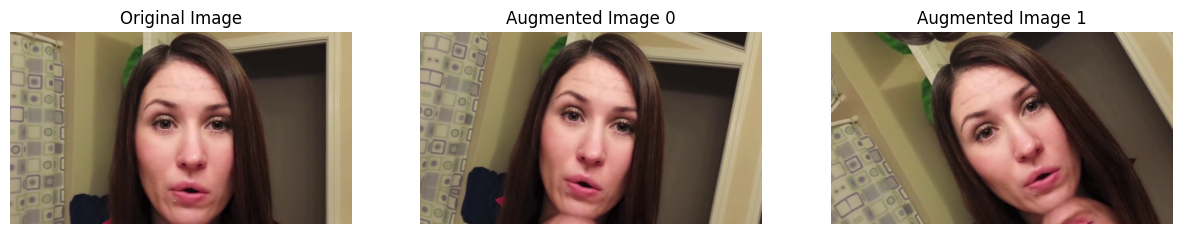

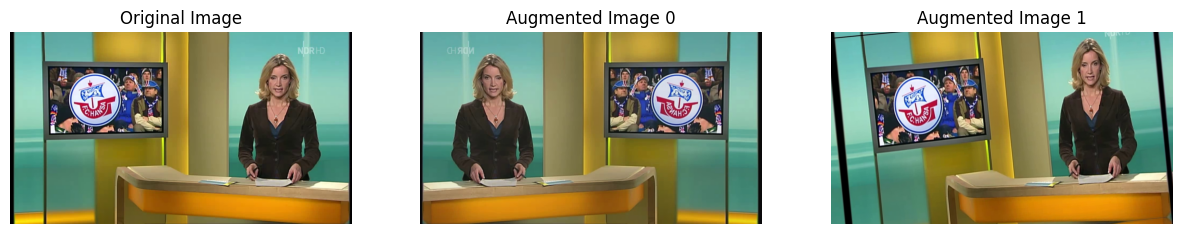

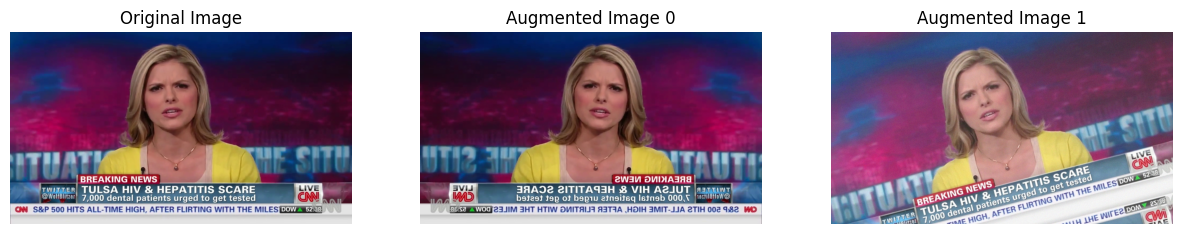

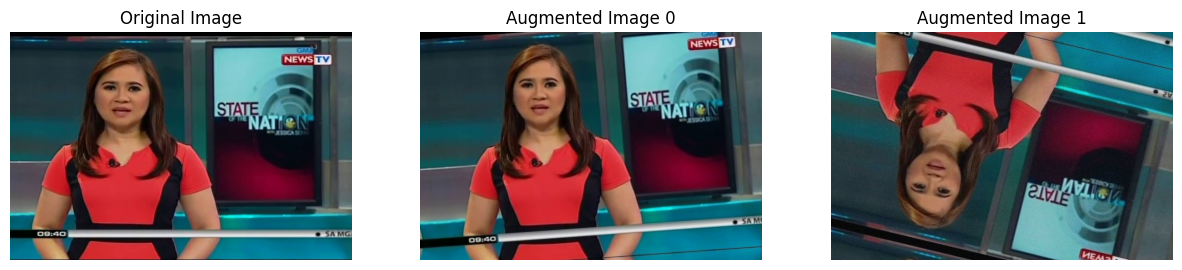

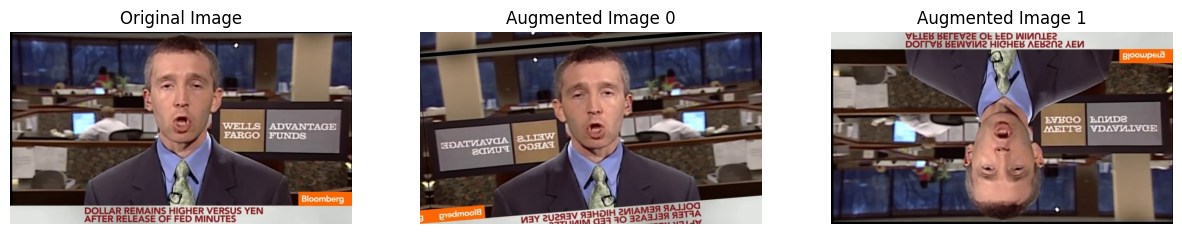

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd

# Load DataFrames
df = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames_v2.csv')
aug_df = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/augmented_frames/augmented_real_images_v3.csv')

# Check counts
print("Count of Real (label 0) in original:", len(df[df['label'] == 0]))
print("Count of Fake (label 1) in original:", len(df[df['label'] == 1]))
print("Count of Real (label 0) in augmented:", len(aug_df[aug_df['label'] == 0]))
print("Count of Fake (label 1) in augmented:", len(aug_df[aug_df['label'] == 1]))

# Function to visualize original and augmented images side by side
def visualize_augmentation(original_path, augmented_paths):
    try:
        # Load original image
        original_image = cv2.imread(original_path)
        if original_image is None:
            print(f"Error loading original image: {original_path}")
            return

        # Convert original image from BGR to RGB
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Plot original image
        plt.figure(figsize=(15, 5))
        plt.subplot(1, len(augmented_paths) + 1, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        # Plot augmented images
        for i, aug_path in enumerate(augmented_paths, start=2):
            aug_image = cv2.imread(aug_path)
            if aug_image is None:
                print(f"Error loading augmented image: {aug_path}")
                continue

            # Convert augmented image from BGR to RGB
            aug_image = cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(augmented_paths) + 1, i)
            plt.imshow(aug_image)
            plt.title(f'Augmented Image {i - 2}')
            plt.axis('off')

        plt.show()

    except Exception as e:
        print(f"Error during visualization: {e}")

# Filter real images
real_images = df[df['label'] == 0]

# Randomly select a few real images for visualization
sample_size = 5
sample_indices = random.sample(range(len(real_images)), sample_size)

for idx in sample_indices:
    try:
        # Get original image path
        original_path = real_images.iloc[idx]['image_path']

        # Find corresponding augmented images
        image_name = os.path.splitext(os.path.basename(original_path))[0]
        augmented_paths = aug_df[aug_df['image_path'].str.contains(image_name)]['image_path'].tolist()

        # Ensure at least two augmented versions exist
        if len(augmented_paths) < 2:
            print(f"Not enough augmented versions found for: {original_path}")
            continue

        # Visualize the original and augmented images
        visualize_augmentation(original_path, augmented_paths[:2])

    except Exception as e:
        print(f"Error processing index {idx}: {e}")


### Saving Df for model training

In [ ]:
import pandas as pd
import random

# Print original dataset counts
print("Original Dataset:")
print("Count of Real (label 0):", len(df[df['label'] == 0]))
print("Count of Fake (label 1):", len(df[df['label'] == 1]))

# Print augmented dataset counts
print("\nAugmented Dataset:")
print("Count of Real (label 0):", len(aug_df[aug_df['label'] == 0]))
print("Count of Fake (label 1):", len(aug_df[aug_df['label'] == 1]))

# Combine original and augmented datasets
combined_df = pd.concat([df, aug_df], ignore_index=True)

# Adjust counts for real images
real_images = combined_df[combined_df['label'] == 0]
fake_images = combined_df[combined_df['label'] == 1]

# Ensure 8000 real images
if len(real_images) < 8000:
    print("\nSampling augmented real images to reach 8000...")
    additional_real = real_images.sample(n=8000 - len(real_images), replace=True, random_state=42)
    real_images = pd.concat([real_images, additional_real], ignore_index=True)
elif len(real_images) > 8000:
    print("\nDownsampling real images to 8000...")
    real_images = real_images.sample(n=8000, random_state=42)

# Ensure 8000 fake images
if len(fake_images) > 8000:
    print("\nDownsampling fake images to 8000...")
    fake_images = fake_images.sample(n=8000, random_state=42)

# Combine balanced datasets
balanced_df = pd.concat([real_images, fake_images], ignore_index=True)

# Print balanced dataset counts
print("\nBalanced Dataset:")
print("Count of Real (label 0):", len(balanced_df[balanced_df['label'] == 0]))
print("Count of Fake (label 1):", len(balanced_df[balanced_df['label'] == 1]))

# Save the balanced DataFrame to a pickle file
balanced_df.to_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')

# Optionally, save the balanced DataFrame to a CSV file
balanced_df.to_csv('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.csv', index=False)

# Display a summary of the balanced DataFrame
print("\nBalanced DataFrame Summary:")
print(balanced_df.head())


Original Dataset:
Count of Real (label 0): 2700
Count of Fake (label 1): 8000

Augmented Dataset:
Count of Real (label 0): 5400
Count of Fake (label 1): 0

Downsampling real images to 8000...

Balanced Dataset:
Count of Real (label 0): 8000
Count of Fake (label 1): 8000

Balanced DataFrame Summary:
                                          image_path  label
0  /content/drive/MyDrive/DeepFakeDetection/augme...      0
1  /content/drive/MyDrive/DeepFakeDetection/augme...      0
2  /content/drive/MyDrive/DeepFakeDetection/augme...      0
3  /content/drive/MyDrive/DeepFakeDetection/augme...      0
4  /content/drive/MyDrive/DeepFakeDetection/augme...      0


In [ ]:
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')


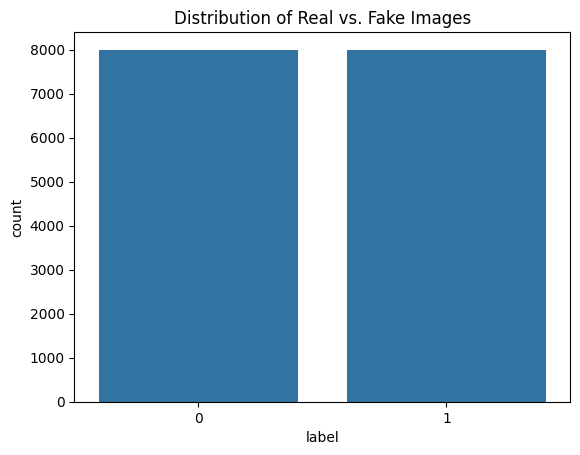

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of real vs. fake images
sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs. Fake Images')
plt.show()


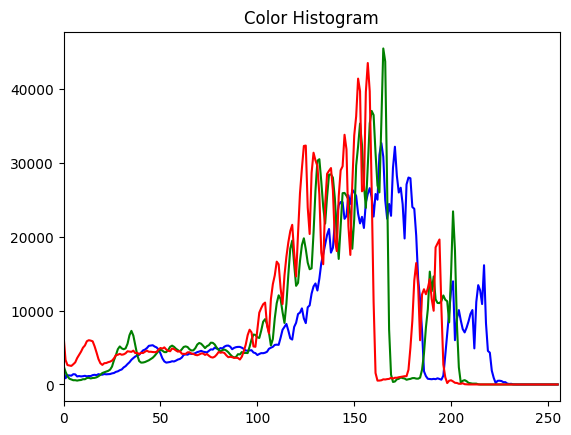

In [ ]:
def plot_color_histogram(image_path):
    """Plots the color histogram of the image."""
    image = cv2.imread(image_path)
    colors = ('b', 'g', 'r')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.show()

# Example: Plot histogram for a random real image
plot_color_histogram(random.choice(df[df['label'] == 0]['image_path'].tolist()))


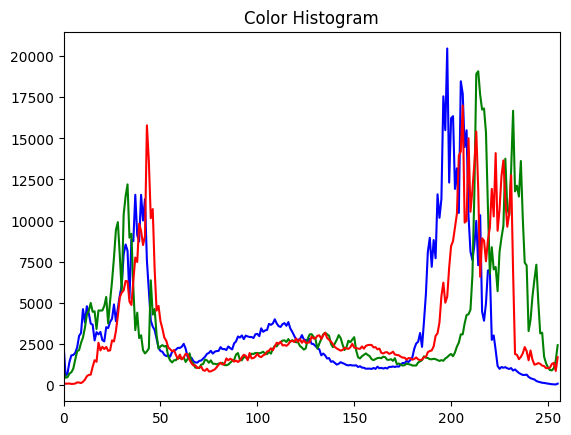

In [ ]:
plot_color_histogram(random.choice(df[df['label'] == 1]['image_path'].tolist()))

In [ ]:
# Function to compute Laplacian variance (blurriness detection)
def compute_blurriness(image_path):
    """Computes the blurriness of the image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return cv2.Laplacian(image, cv2.CV_64F).var()

# Example: Compute blurriness for a real and a fake image
real_img_path = random.choice(df[df['label'] == 0]['image_path'].tolist())
fake_img_path = random.choice(df[df['label'] == 1]['image_path'].tolist())

print(f"Blurriness (Real): {compute_blurriness(real_img_path)}")
print(f"Blurriness (Fake): {compute_blurriness(fake_img_path)}")

Blurriness (Real): 269.41308924483155
Blurriness (Fake): 264.890846511505


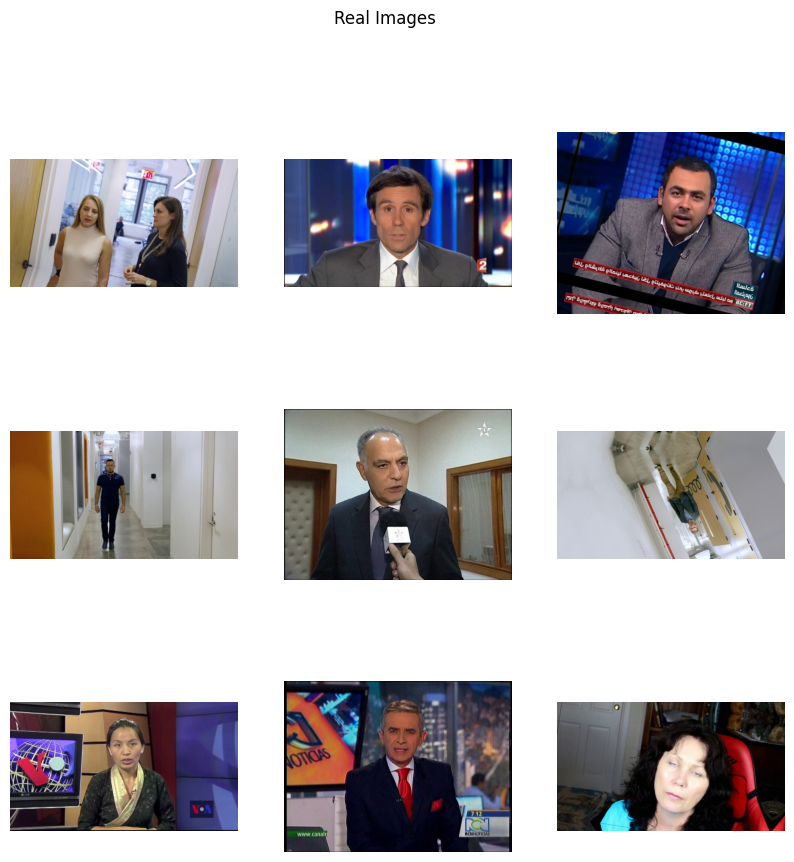

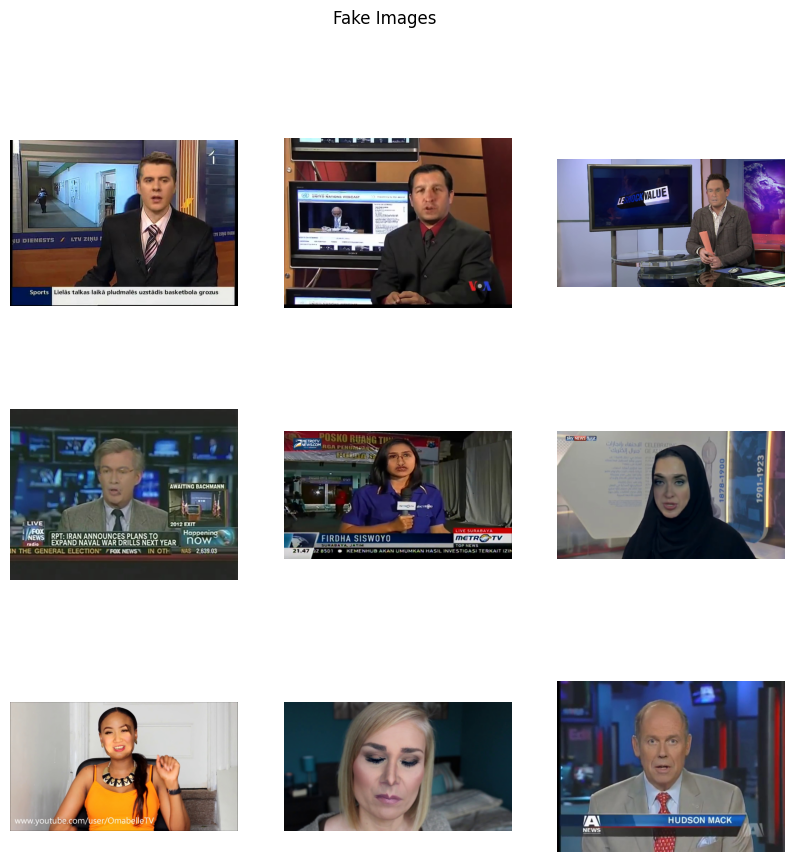

In [ ]:
# Function to plot random images for manual inspection
def show_images(image_paths, title, num_images=9):
    """Displays random images for visual inspection."""
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        img = cv2.imread(image_paths[i])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Example: Show 9 random real and 9 random fake images
show_images(random.sample(df[df['label'] == 0]['image_path'].tolist(), 9), "Real Images")
show_images(random.sample(df[df['label'] == 1]['image_path'].tolist(), 9), "Fake Images")

### Open Pickle File

In [ ]:
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')


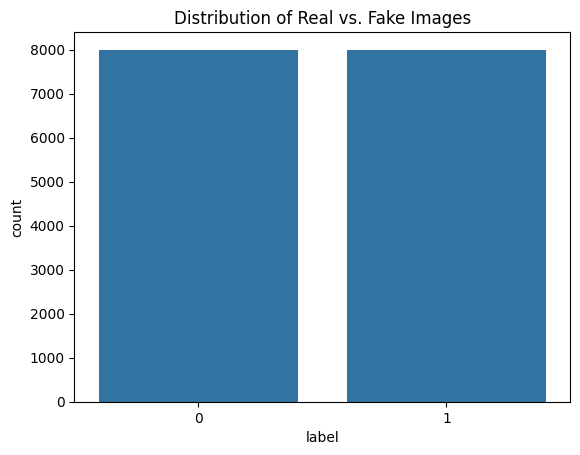

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of real vs. fake images
sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs. Fake Images')
plt.show()


# Step 4: Model Training & Evaluation

## Train on randomized weight ( from scratch)

In [ ]:
import os
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Set random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Define a function to build models
def build_model(base_model):
    base_model.trainable = True  # Make all layers trainable (not frozen)
    model = tf.keras.Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load and split data
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')
df['label'] = df['label'].astype(str)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=0.33, random_state=SEED)

# Set up ImageDataGenerators for normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

# List of models to train and evaluate (with random initialization)
models = {
    "VGG16": VGG16(weights=None, include_top=False, input_shape=(224, 224, 3)),  # No pre-trained weights
    "EfficientNet": EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
}

# Directory to save the models
model_save_dir = "saved_models"
os.makedirs(model_save_dir, exist_ok=True)

# Train and evaluate models
results = {}
for model_name, base_model in models.items():
    print(f"Training {model_name}...")

    model = build_model(base_model)
    start_time = time.time()
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)
    test_loss, test_acc = model.evaluate(test_generator)
    duration = time.time() - start_time

    results[model_name] = {"Test Accuracy": test_acc, "Training Time (s)": duration}
    model.save(os.path.join(model_save_dir, f"{model_name}.h5"))
    print(f"{model_name} - Test Accuracy: {test_acc:.4f}, Time: {duration:.2f}s")

results_df = pd.DataFrame(results).T
print(results_df)

# Additional model evaluation - Classification Report
report_path = os.path.join(model_save_dir, "classification_report.txt")
with open(report_path, "w") as f:
    for model_name in models.keys():
        print(f"Loading {model_name} for evaluation...")
        model = tf.keras.models.load_model(os.path.join(model_save_dir, f"{model_name}.h5"))
        predictions = model.predict(test_generator)
        predictions = (predictions > 0.5).astype(int).flatten()
        true_labels = test_generator.classes

        f.write(f"Classification Report for {model_name}:\n")
        f.write(classification_report(true_labels, predictions))
        f.write("\n" + "="*60 + "\n")


Found 8400 validated image filenames belonging to 2 classes.
Found 2412 validated image filenames belonging to 2 classes.
Found 1188 validated image filenames belonging to 2 classes.
Training VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


263/263 ━━━━━━━━━━━━━━━━━━━━ 2847s 11s/step - accuracy: 0.4916 - loss: 0.6954 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 141s 527ms/step - accuracy: 0.4936 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 547ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 144s 537ms/step - accuracy: 0.5031 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 145s 543ms/step - accuracy: 0.4978 - loss: 0.6933 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 545ms/step - accuracy: 0.5102 - loss: 0.6930 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 544ms/step - accuracy: 0.4928 - loss: 0.6933 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 146s 543ms/step - accuracy: 0.4998 - loss: 0.693

VGG16 - Test Accuracy: 0.4790, Time: 4747.90s
Training EfficientNet...
Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 236s 610ms/step - accuracy: 0.5108 - loss: 1.4567 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 113s 418ms/step - accuracy: 0.4982 - loss: 0.6980 - val_accuracy: 0.5017 - val_loss: 0.6931
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 114s 426ms/step - accuracy: 0.5221 - loss: 0.6913 - val_accuracy: 0.5282 - val_loss: 0.6911
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 113s 418ms/step - accuracy: 0.5480 - loss: 0.6783 - val_accuracy: 0.6124 - val_loss: 0.6640
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 111s 414ms/step - accuracy: 0.5499 - loss: 0.6751 - val_accuracy: 0.6049 - val_loss: 0.6710
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 113s 420ms/step - accuracy: 0.5810 - loss: 0.6851 - val_accuracy: 0.5597 - val_loss: 0.6829
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 115s 427ms/step - accuracy: 0.6415 - loss: 0.6316 - val_accuracy: 0.6907 - val_loss: 0.5788
Epoch

EfficientNet - Test Accuracy: 0.6911, Time: 1280.76s
Training ResNet50...
Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 208s 548ms/step - accuracy: 0.5084 - loss: 7.1377 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 114s 422ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 114s 422ms/step - accuracy: 0.5076 - loss: 0.6931 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 116s 430ms/step - accuracy: 0.4959 - loss: 0.6932 - val_accuracy: 0.4975 - val_loss: 0.6933
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 116s 432ms/step - accuracy: 0.5011 - loss: 0.6958 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 115s 426ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 116s 431ms/step - accuracy: 0.5057 - loss: 0.6931 - val_accuracy: 0.4983 - val_loss: 0.6932
Ep

ResNet50 - Test Accuracy: 0.4790, Time: 1265.18s
              Test Accuracy  Training Time (s)
VGG16              0.478956        4747.900613
EfficientNet       0.691077        1280.762496
ResNet50           0.478956        1265.178732
Loading VGG16 for evaluation...


AttributeError: Exception encountered when calling Flatten.call().

[1m'list' object has no attribute 'shape'[0m

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_2238>'],)
  • kwargs=<class 'inspect._empty'>

## Train on pre-trained model (image net)

In [ ]:
import os
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Directory to save the models
model_save_dir = "saved_models"
os.makedirs(model_save_dir, exist_ok=True)

### Model Result

In [ ]:
# Verifying dataset

import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl'
df = pd.read_pickle(dataset_path)

# Display basic information
print(df.info())  # Summary of the DataFrame
print(df.head())  # First few rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  16000 non-null  object
 1   label       16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None
                                          image_path  label
0  /content/drive/MyDrive/DeepFakeDetection/augme...      0
1  /content/drive/MyDrive/DeepFakeDetection/augme...      0
2  /content/drive/MyDrive/DeepFakeDetection/augme...      0
3  /content/drive/MyDrive/DeepFakeDetection/augme...      0
4  /content/drive/MyDrive/DeepFakeDetection/augme...      0


In [ ]:
print("Columns:", df.columns)

# Check for null values
print("Null values:\n", df.isnull().sum())

# Check for unique labels
print("Unique labels:", df['label'].unique())


Columns: Index(['image_path', 'label'], dtype='object')
Null values:
 image_path    0
label         0
dtype: int64
Unique labels: [0 1]


In [ ]:
# Total number of rows
print("Total samples:", len(df))

# Distribution of labels
print("Label distribution:\n", df['label'].value_counts())


Total samples: 16000
Label distribution:
 label
0    8000
1    8000
Name: count, dtype: int64


In [ ]:
import os

# Check if all image paths exist
missing_files = df[~df['image_path'].apply(os.path.exists)]
print(f"Missing image paths: {len(missing_files)}")

# Optionally print missing paths
if not missing_files.empty:
    print(missing_files['image_path'].tolist())


Missing image paths: 0


In [ ]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping

# Constants
SEED = 42
MODEL_SAVE_DIR = "./models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')
df['label'] = df['label'].astype(str)

# Splitting data: 70% train, 20% test, 10% validation
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# Verify split sizes
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")

# ImageDataGenerator initialization for normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

# List of pretrained models
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "EfficientNet": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Function to build a model
def build_model(base_model):
    # Define the input layer
    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)  # Enable training for fine-tuning
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
results = {}
for model_name, base_model in models.items():
    print(f"Training {model_name}...")

    # Build the model
    model = build_model(base_model)

    # Initialize EarlyStopping
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=3,          # Stop after 3 epochs with no improvement
        restore_best_weights=True,  # Restore the best model weights
        verbose=1
    )

    # Train the model
    start_time = time.time()
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=[early_stopping]  # Add EarlyStopping to callbacks
    )

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_generator)
    duration = time.time() - start_time

    # Save results
    results[model_name] = {"Test Accuracy": test_acc, "Training Time (s)": duration}
    model.save(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))  # Use .keras format
    print(f"{model_name} - Test Accuracy: {test_acc:.4f}, Time: {duration:.2f}s")

# Save results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


# Save classification reports
report_path = os.path.join(MODEL_SAVE_DIR, "classification_report.txt")
with open(report_path, "w") as f:
    for model_name in models.keys():
        print(f"Evaluating {model_name}...")
        # Load the model using the .keras format
        model = tf.keras.models.load_model(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))
        predictions = model.predict(test_generator)
        predictions = (predictions > 0.5).astype(int).flatten()
        true_labels = test_generator.classes

        # Write classification report
        f.write(f"Classification Report for {model_name}:\n")
        f.write(classification_report(true_labels, predictions))
        f.write("\n" + "="*60 + "\n")


Training set: 11200 samples
Validation set: 1600 samples
Testing set: 3200 samples
Found 11200 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 5557s 16s/step - accuracy: 0.4920 - loss: 0.9632 - val_accuracy: 0.5038 - val_loss: 0.6931
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 181s 510ms/step - accuracy: 0.4909 - loss: 0.6932 - val_accuracy: 0.5038 - val_loss: 0.6931
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 181s 510ms/step - accuracy: 0.4939 - loss: 0.6932 - val_accuracy: 0.4963 - val_loss: 0.6931
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 180s 509ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.4963 - val_loss: 0.6932
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
100/100 ━━━━━━━━━━━━━━━━━━━━ 1320s 13s/step - accuracy: 0.5117 - loss: 0.6931
VGG16 - Test Accuracy: 0.5019, Time: 7465.40s
Training EfficientNet...
Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 204s 360ms/step - accuracy: 0.6655 - loss: 0.8843 - val_accuracy: 0.4931 - val_loss: 3.2860
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 120s 336ms/step - accuracy: 0.7216 - loss: 0.5424 - val_accuracy: 0.7006 - val_l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 284ms/step
Evaluating ResNet50...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 286ms/step


## Revised Code


In [ ]:
from google.colab import drive
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image, ImageChops, ImageEnhance

Training set: 11200 samples
Validation set: 1600 samples
Testing set: 3200 samples
Found 11200 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 2949s 8s/step - accuracy: 0.5647 - loss: 0.7318 - val_accuracy: 0.6600 - val_loss: 0.6437
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 257s 718ms/step - accuracy: 0.6456 - loss: 0.6391 - val_accuracy: 0.6856 - val_loss: 0.6115
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 254s 710ms/step - accuracy: 0.6878 - loss: 0.6020 - val_accuracy: 0.6944 - val_loss: 0.5953
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 253s 709ms/step - accuracy: 0.7001 - loss: 0.5809 - val_accuracy: 0.6988 - val_loss: 0.5846
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 256s 717ms/step - accuracy: 0.7000 - loss: 0.5786 - val_accuracy: 0.7056 - val_loss: 0.5801
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 256s 718ms/step - accuracy: 0.7128 - loss: 0.5576 - val_accuracy: 0.6900 - val_loss: 0.5960
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 255s 715ms/step - accuracy: 0.7264 - loss: 0.5500 - val_accuracy: 0.7225 - val_loss: 0.5575
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 255s 715ms/step - accuracy: 0.7312 - loss: 0.5409

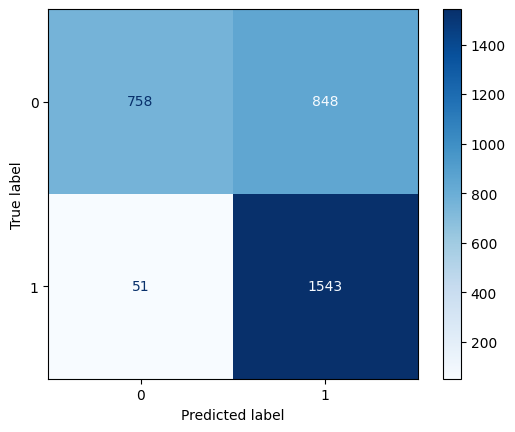

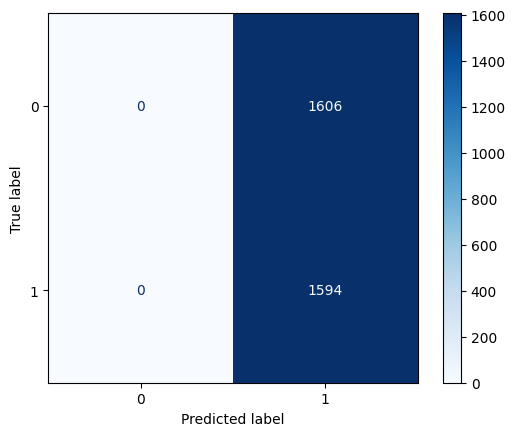

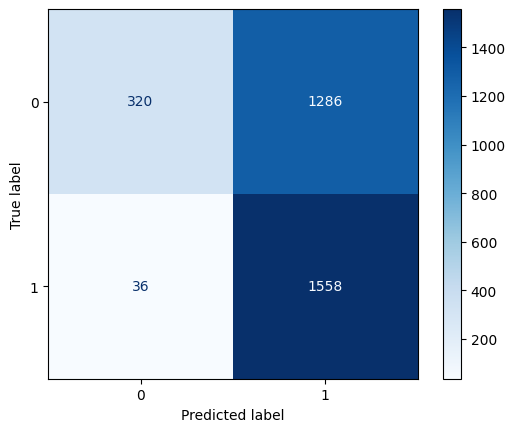

In [ ]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Constants
SEED = 42
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')
df['label'] = df['label'].astype(str)

# Splitting data: 70% train, 20% test, 10% validation
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# Verify split sizes
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")

# ImageDataGenerator initialization with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

# List of pretrained models
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "EfficientNet": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Function to build a model
def build_model(base_model):
    # Freeze initial layers to prevent overfitting
    for layer in base_model.layers[:-10]:  # Adjust layers to unfreeze more or fewer
        layer.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.6)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
results = {}
optimal_thresholds = {}
for model_name, base_model in models.items():
    print(f"Training {model_name}...")

    # Build the model
    model = build_model(base_model)

    # Initialize EarlyStopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

    # Train the model
    start_time = time.time()
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=[early_stopping]
    )

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_generator)
    duration = time.time() - start_time

    # Save the model
    model.save(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))

    # Save results
    results[model_name] = {"Test Accuracy": test_acc, "Training Time (s)": duration}

    # Find optimal threshold
    predictions = model.predict(val_generator).flatten()
    precisions, recalls, thresholds = precision_recall_curve(val_generator.classes, predictions)
    optimal_idx = (precisions + recalls - 1).argmax()
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds[model_name] = optimal_threshold

    print(f"{model_name} - Test Accuracy: {test_acc:.4f}, Time: {duration:.2f}s, Optimal Threshold: {optimal_threshold:.4f}")

# Save results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Save classification reports
report_path = os.path.join(MODEL_SAVE_DIR, "classification_report.txt")
with open(report_path, "w") as f:
    for model_name in models.keys():
        print(f"Evaluating {model_name}...")
        model = tf.keras.models.load_model(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))
        predictions = model.predict(test_generator).flatten()
        predictions = (predictions > optimal_thresholds[model_name]).astype(int)
        true_labels = test_generator.classes

        # Save classification report
        f.write(f"Classification Report for {model_name}:\n")
        f.write(classification_report(true_labels, predictions, zero_division=1))
        f.write("\n" + "="*60 + "\n")

        # Save confusion matrix
        cm = confusion_matrix(true_labels, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
        disp.plot(cmap='Blues')
        disp.figure_.savefig(os.path.join(MODEL_SAVE_DIR, f"{model_name}_confusion_matrix.png"))


## Revised Code 2

Training set: 11200 samples
Validation set: 1600 samples
Testing set: 3200 samples
Found 11200 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.
Training VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 305s 765ms/step - accuracy: 0.5512 - loss: 0.7261 - val_accuracy: 0.6612 - val_loss: 0.6424
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 264s 739ms/step - accuracy: 0.6624 - loss: 0.6241 - val_accuracy: 0.6825 - val_loss: 0.6138
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 264s 739ms/step - accuracy: 0.6802 - loss: 0.6011 - val_accuracy: 0.6812 - val_loss: 0.6121
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 262s 735ms/step - accuracy: 0.6900 - loss: 0.5898 - val_accuracy: 0.6919 - val_loss: 0.5937
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 263s 738ms/step - accuracy: 0.7034 - loss: 0.5780 - val_accuracy: 0.7013 - val_loss: 0.5825
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 260s 729ms/step - accuracy: 0.7194 - loss: 0.5521 - val_accuracy: 0.7119 - val_loss: 0.5639
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 258s 722ms/step - accuracy: 0.7279 - loss: 0.5348 - val_accuracy: 0.7212 - val_loss: 0.5547
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 256s 716ms/step - accuracy: 0.7404 - loss: 0.52

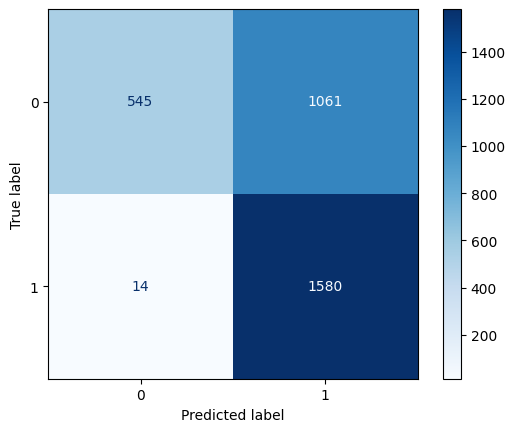

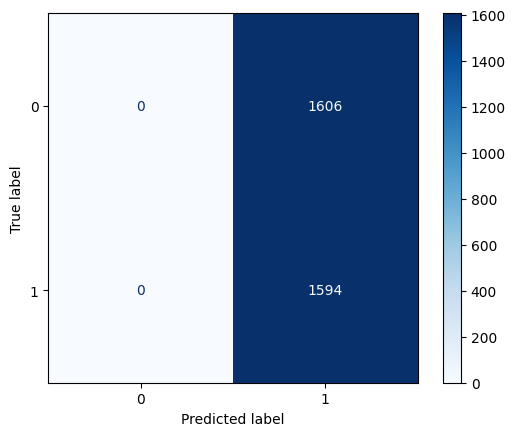

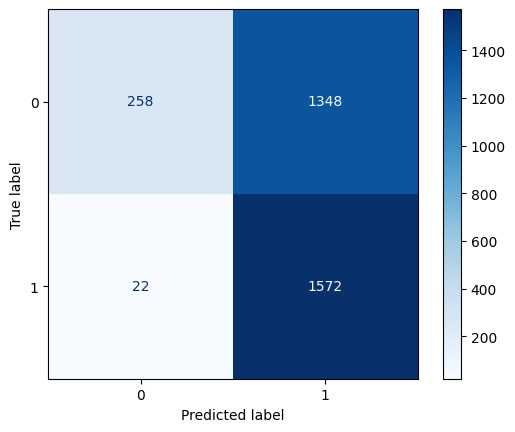

In [ ]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Constants
SEED = 42
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')
df['label'] = df['label'].astype(str)

# Splitting data: 70% train, 20% test, 10% validation
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# Verify split sizes
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")

# ImageDataGenerator initialization with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

# List of pretrained models
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "EfficientNet": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Function to build a model
def build_model(base_model):
    # Freeze initial layers to prevent overfitting
    for layer in base_model.layers[:-10]:  # Adjust layers to unfreeze more or fewer
        layer.trainable = False

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.6)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
results = {}
optimal_thresholds = {}
for model_name, base_model in models.items():
    print(f"Training {model_name}...")

    # Build the model
    model = build_model(base_model)

    # Initialize EarlyStopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

    # Train the model
    start_time = time.time()
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        callbacks=[early_stopping]
    )

    # Plot training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    loss_plot_path = os.path.join(MODEL_SAVE_DIR, f"{model_name}_loss_plot.png")
    plt.savefig(loss_plot_path)
    plt.close()

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_generator)
    duration = time.time() - start_time

    # Save the model
    model.save(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))

    # Save results
    results[model_name] = {"Test Accuracy": test_acc, "Training Time (s)": duration}

    # Find optimal threshold
    predictions = model.predict(val_generator).flatten()
    precisions, recalls, thresholds = precision_recall_curve(val_generator.classes, predictions)
    optimal_idx = (precisions + recalls - 1).argmax()
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds[model_name] = optimal_threshold

    print(f"{model_name} - Test Accuracy: {test_acc:.4f}, Time: {duration:.2f}s, Optimal Threshold: {optimal_threshold:.4f}")

# Save results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Save classification reports
report_path = os.path.join(MODEL_SAVE_DIR, "classification_report.txt")
with open(report_path, "w") as f:
    for model_name in models.keys():
        print(f"Evaluating {model_name}...")

        # Load the trained model
        model = tf.keras.models.load_model(os.path.join(MODEL_SAVE_DIR, f"{model_name}.keras"))

        # Get predictions
        predictions = model.predict(test_generator).flatten()
        predictions = (predictions > optimal_thresholds[model_name]).astype(int)
        true_labels = test_generator.classes

        # Save classification report
        f.write(f"Classification Report for {model_name}:\n")
        f.write(classification_report(true_labels, predictions, zero_division=1))
        f.write("\n" + "="*60 + "\n")

        # Save confusion matrix
        cm = confusion_matrix(true_labels, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
        disp.plot(cmap='Blues')
        disp.figure_.savefig(os.path.join(MODEL_SAVE_DIR, f"{model_name}_confusion_matrix.png"))


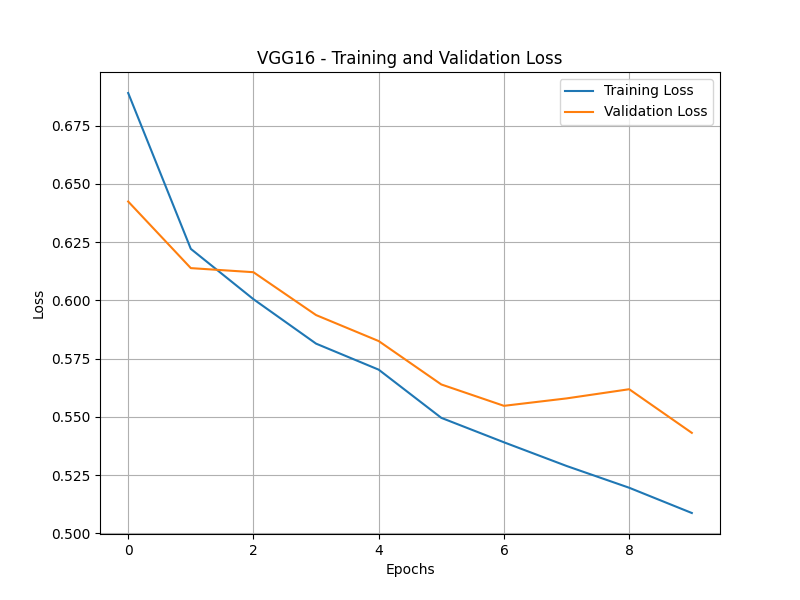

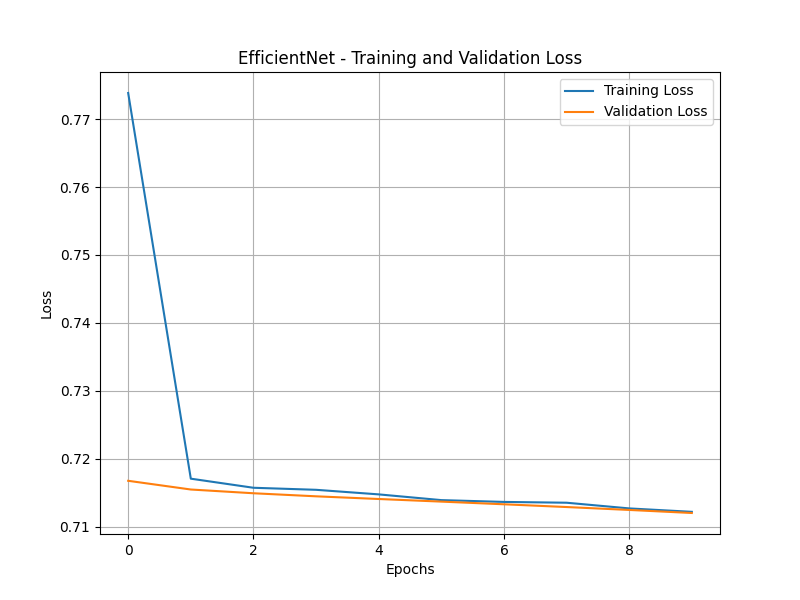

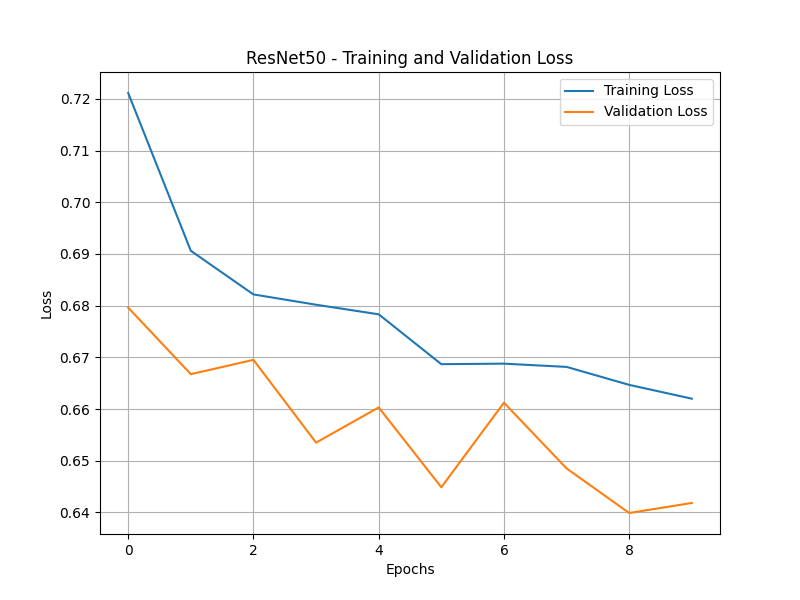

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/DeepFakeDetection/models/VGG16_loss_plot.png"))
display(Image(filename="/content/drive/MyDrive/DeepFakeDetection/models/EfficientNet_loss_plot.png"))
display(Image(filename="/content/drive/MyDrive/DeepFakeDetection/models/ResNet50_loss_plot.png"))



# Step 5 Model Tuning

### Model Tuning - VGG16

Found 11200 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.
Training improved VGG16...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 301s 751ms/step - accuracy: 0.5065 - loss: 0.7858 - val_accuracy: 0.5925 - val_loss: 0.7344 - learning_rate: 3.0000e-05
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 267s 747ms/step - accuracy: 0.5325 - loss: 0.7414 - val_accuracy: 0.5950 - val_loss: 0.7240 - learning_rate: 3.0000e-05
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 267s 747ms/step - accuracy: 0.5634 - loss: 0.7299 - val_accuracy: 0.6062 - val_loss: 0.7078 - learning_rate: 3.0000e-05
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 265s 743ms/step - accuracy: 0.5799 - loss: 0.7201 - val_accuracy: 0.5969 - val_loss: 0.7107 - learning_rate: 3.0000e-05
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 263s 738ms/step - accuracy: 0.6070 - loss: 0.7042 - val_accuracy: 0.6306 - val_loss: 0.6843 - learning_rate: 3.0000e-05
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 264s 739ms/step - accuracy: 0.6449 - loss: 0.6652 - val_accuracy: 0.6325 - val_loss: 0.6788 - learning_rate: 3.0000e-05
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 268s 750ms/

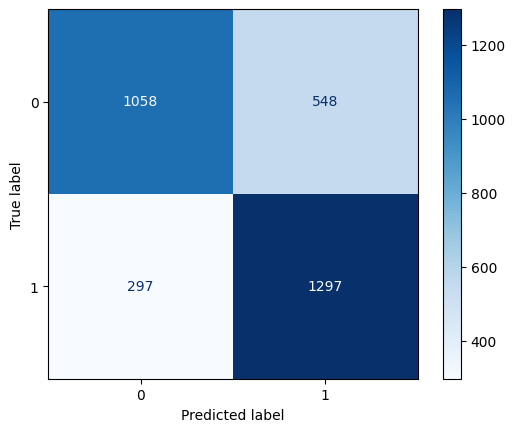

In [ ]:
# Import necessary libraries
import os
import time
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt

# Constants
SEED = 42
MODEL_SAVE_DIR = "/content/drive/MyDrive/DeepFakeDetection/improved_models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Load and preprocess dataset
df = pd.read_pickle('/content/drive/MyDrive/DeepFakeDetection/selected_video_frames.pkl')
df['label'] = df['label'].astype(str)

# Splitting data
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED)
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=SEED)

# ImageDataGenerator initialization with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=True
)
val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)
test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='image_path', y_col='label',
    target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False
)

# Build improved VGG16 model
def build_improved_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved VGG16...")
improved_vgg16 = build_improved_vgg16()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

# Train
start_time = time.time()
history = improved_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved VGG16 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_vgg16.evaluate(test_generator)
duration = time.time() - start_time

# Save the model
improved_vgg16.save(os.path.join(MODEL_SAVE_DIR, "improved_vgg16.keras"))

# Confusion matrix and classification report
predictions = improved_vgg16.predict(test_generator).flatten()
optimal_threshold = 0.5  # Default threshold for binary classification
binary_predictions = (predictions > optimal_threshold).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_vgg16_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved VGG16 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


## Model Tuning - EfficientNet

Training improved EfficientNet...
Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 345s 732ms/step - accuracy: 0.5253 - loss: 0.7656 - val_accuracy: 0.4944 - val_loss: 0.7550 - learning_rate: 3.0000e-05
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 259s 726ms/step - accuracy: 0.6086 - loss: 0.7206 - val_accuracy: 0.6331 - val_loss: 0.6954 - learning_rate: 3.0000e-05
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 258s 721ms/step - accuracy: 0.6460 - loss: 0.6823 - val_accuracy: 0.6850 - val_loss: 0.6636 - learning_rate: 3.0000e-05
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 262s 736ms/step - accuracy: 0.6774 - loss: 0.6401 - val_accuracy: 0.6837 - val_loss: 0.6442 - learning_rate: 3.0000e-05
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 261s 731ms/step - accuracy: 0.7029 - loss: 0.6179 - val_accuracy: 0.6894 - val_loss: 0.6336 - learning_rate: 3.0000e-05
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 263s 738ms/step - accuracy: 0.7153 - loss: 0.5999 - val_accuracy: 0.7006 - val_loss: 0.6231 - learning_rate: 3.0000e-05
Epoch 

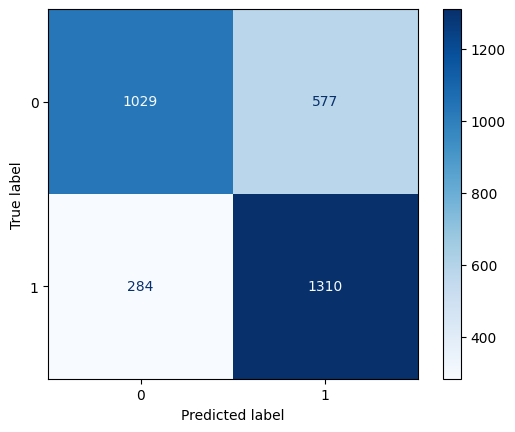

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

# Build the EfficientNet model
def build_improved_efficientnet():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved EfficientNet...")
improved_efficientnet = build_improved_efficientnet()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

# Train the model
start_time = time.time()
history = improved_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved EfficientNet - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_efficientnet_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_efficientnet.evaluate(test_generator)
duration = time.time() - start_time

# Save the model
improved_efficientnet.save(os.path.join(MODEL_SAVE_DIR, "improved_efficientnet.keras"))

# Confusion matrix and classification report
predictions = improved_efficientnet.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_efficientnet_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_efficientnet_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved EfficientNet - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


## Model Tuning - Resnet50

Training improved ResNet50...
Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 324s 725ms/step - accuracy: 0.5373 - loss: 0.8357 - val_accuracy: 0.4688 - val_loss: 0.7596 - learning_rate: 3.0000e-05
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 253s 709ms/step - accuracy: 0.6556 - loss: 0.6691 - val_accuracy: 0.6344 - val_loss: 0.7565 - learning_rate: 3.0000e-05
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 241s 674ms/step - accuracy: 0.7004 - loss: 0.6149 - val_accuracy: 0.6781 - val_loss: 0.6863 - learning_rate: 3.0000e-05
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 238s 668ms/step - accuracy: 0.7348 - loss: 0.5800 - val_accuracy: 0.6762 - val_loss: 0.6523 - learning_rate: 3.0000e-05
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 239s 670ms/step - accuracy: 0.7484 - loss: 0.5460 - val_accuracy: 0.7175 - val_loss: 0.5821 - learning_rate: 3.0000e-05
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 248s 696ms/step - accuracy: 0.7610 - loss: 0.5369 - val_accuracy: 0.6100 - val_loss: 0.6744 - learning_rate: 3.0000e-05
Epoch 7/20

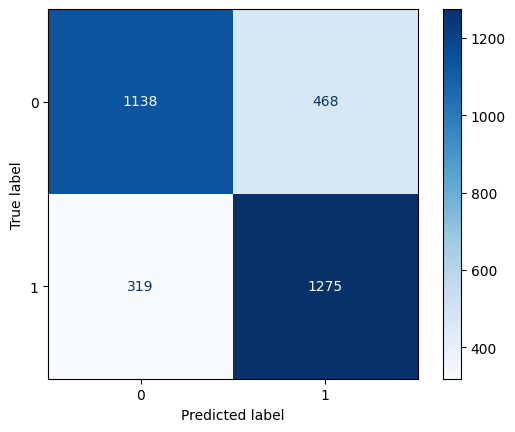

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Build the ResNet50 model
def build_improved_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze more layers for fine-tuning
    for layer in base_model.layers[:-5]:
        layer.trainable = True

    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling instead of Flatten
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
print("Training improved ResNet50...")
improved_resnet50 = build_improved_resnet50()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
)

# Train the model
start_time = time.time()
history = improved_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved ResNet50 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_loss_plot.png")
plt.savefig(loss_plot_path)
plt.close()

# Evaluate on test data
test_loss, test_acc = improved_resnet50.evaluate(test_generator)
duration = time.time() - start_time

# Save the model
improved_resnet50.save(os.path.join(MODEL_SAVE_DIR, "improved_resnet50.keras"))

# Confusion matrix and classification report
predictions = improved_resnet50.predict(test_generator).flatten()
binary_predictions = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
confusion_matrix_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_confusion_matrix.png")
disp.figure_.savefig(confusion_matrix_path)

# Classification Report
report = classification_report(true_labels, binary_predictions, target_names=list(test_generator.class_indices.keys()))
report_path = os.path.join(MODEL_SAVE_DIR, "improved_resnet50_classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)

# Results summary
print(f"Improved ResNet50 - Test Accuracy: {test_acc:.4f}, Training Time: {duration:.2f}s")
print(report)


# Step 6: Cross Validation using Celeb-DF dataset

# Step 7: Deepfake Detection Implementation

## VGG16 Improved model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/DeepFakeDetection/improved_models/improved_vgg16.keras'
model = load_model(model_path)

# Check the model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,511,493 (242.28 MB)

 Trainable params: 21,170,497 (80.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,340,996 (161.52 MB)

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
model_path = '/content/drive/MyDrive/DeepFakeDetection/improved_models/improved_vgg16.keras'
#image_path = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/11__talking_against_wall_frame4.jpg'  # Replace with the actual path
#image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/01_11__talking_against_wall__9229VVZ3_frame10.jpg'  # Replace with the actual path
#image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/585_599_frame1.jpg'  # Replace with the actual path
image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/09_13__kitchen_pan__21H6XSPE_frame4.jpg'  # Replace with the actual path



# Load the trained model
model = load_model(model_path)
print("Model loaded successfully!")

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess an image for prediction."""
    try:
        # Load the image
        image = load_img(image_path, target_size=target_size)

        # Convert the image to a numpy array
        image_array = img_to_array(image)

        # Normalize the image (scale pixel values to [0, 1])
        image_array = image_array / 255.0

        # Add a batch dimension
        image_array = np.expand_dims(image_array, axis=0)
        return image_array
    except Exception as e:
        print(f"Error loading or processing the image: {e}")
        return None

# Preprocess the sample image
input_image = preprocess_image(image_path)

if input_image is not None:
    # Predict using the model
    prediction = model.predict(input_image)

    # Interpret the result
    if prediction[0][0] > 0.5:
        print(f"The model predicts the image is FAKE with a confidence of {prediction[0][0]:.2f}")
    else:
        print(f"The model predicts the image is ORIGINAL with a confidence of {1 - prediction[0][0]:.2f}")
else:
    print("Could not process the image for prediction.")


Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
The model predicts the image is ORIGINAL with a confidence of 0.52


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K

# Define paths
model_path = '/content/drive/MyDrive/DeepFakeDetection/improved_models/improved_vgg16.keras'
image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/09_13__kitchen_pan__21H6XSPE_frame4.jpg'

# Load the trained model
model = load_model(model_path)
print("Model loaded successfully!")

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess an image for prediction."""
    try:
        # Load the image
        image = load_img(image_path, target_size=target_size)

        # Convert the image to a numpy array
        image_array = img_to_array(image)

        # Normalize the image (scale pixel values to [0, 1])
        image_array = image_array / 255.0

        # Add a batch dimension
        image_array = np.expand_dims(image_array, axis=0)
        return image_array
    except Exception as e:
        print(f"Error loading or processing the image: {e}")
        return None

# Function to generate the Grad-CAM heatmap
def generate_gradcam(model, image_array, layer_name='block5_conv3', class_idx=None):
    """Generate a Grad-CAM heatmap for a given image and model."""
    # Get the model's output for the specific class (if class_idx is None, use the predicted class)
    if class_idx is None:
        class_idx = np.argmax(model.predict(image_array))

    # Get the last convolutional layer and the model's output layer
    conv_layer = model.get_layer(layer_name)
    output_layer = model.output[:, class_idx]

    # Compute the gradient of the output with respect to the convolutional layer
    grads = K.gradients(output_layer, conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))  # Global average pooling
    iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])

    # Get the values of the pooled gradients and convolutional layer activations
    pooled_grads_value, conv_layer_output_value = iterate([image_array])

    # Multiply each channel in the feature map by the corresponding weight
    for i in range(conv_layer_output_value.shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # Compute the heatmap by summing the channels
    heatmap = np.mean(conv_layer_output_value, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap, class_idx

# Function to display the image and the heatmap
def display_gradcam(image_path, heatmap, class_idx, alpha=0.4):
    """Display the original image and overlay the Grad-CAM heatmap."""
    # Load the original image
    image = load_img(image_path)
    image = np.array(image)

    # Resize the heatmap to match the image size
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.resize(heatmap, (image.shape[0], image.shape[1], 1))
    heatmap = np.repeat(heatmap, 3, axis=-1)  # Convert heatmap to 3 channels

    # Apply the heatmap on top of the image
    superimposed_img = heatmap * alpha + image

    # Display the image with the heatmap overlay
    plt.figure(figsize=(10, 10))
    plt.imshow(superimposed_img)
    plt.title(f'Prediction: {"FAKE" if class_idx == 1 else "ORIGINAL"} with confidence: {prediction[0][class_idx]:.2f}')
    plt.axis('off')
    plt.show()

# Preprocess the sample image
input_image = preprocess_image(image_path)

if input_image is not None:
    # Predict using the model
    prediction = model.predict(input_image)

    # Predict the class
    predicted_class = 1 if prediction[0][0] > 0.5 else 0

    # Generate Grad-CAM heatmap
    heatmap, class_idx = generate_gradcam(model, input_image)

    # Display the original image and overlay the heatmap
    display_gradcam(image_path, heatmap, predicted_class)
else:
    print("Could not process the image for prediction.")


### Resnet Improved model

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
model_path = '/content/drive/MyDrive/DeepFakeDetection/improved_models/improved_resnet50.keras'
image_path = '/content/drive/MyDrive/DeepFakeDetection/OriginalFrames/DeepFakeDetection/11__talking_against_wall_frame4.jpg'  # Replace with the actual path
#image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/01_11__talking_against_wall__9229VVZ3_frame10.jpg'  # Replace with the actual path
#image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/FaceForensics/FaceSwap/585_599_frame1.jpg'  # Replace with the actual path
#image_path = '/content/drive/MyDrive/DeepFakeDetection/FakeFrames/DeepFakeDetection/09_13__kitchen_pan__21H6XSPE_frame4.jpg'  # Replace with the actual path



# Load the trained model
model = load_model(model_path)
print("Model loaded successfully!")

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess an image for prediction."""
    try:
        # Load the image
        image = load_img(image_path, target_size=target_size)

        # Convert the image to a numpy array
        image_array = img_to_array(image)

        # Normalize the image (scale pixel values to [0, 1])
        image_array = image_array / 255.0

        # Add a batch dimension
        image_array = np.expand_dims(image_array, axis=0)
        return image_array
    except Exception as e:
        print(f"Error loading or processing the image: {e}")
        return None

# Preprocess the sample image
input_image = preprocess_image(image_path)

if input_image is not None:
    # Predict using the model
    prediction = model.predict(input_image)

    # Interpret the result
    if prediction[0][0] > 0.5:
        print(f"The model predicts the image is FAKE with a confidence of {prediction[0][0]:.2f}")
    else:
        print(f"The model predicts the image is ORIGINAL with a confidence of {1 - prediction[0][0]:.2f}")
else:
    print("Could not process the image for prediction.")


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The model predicts the image is ORIGINAL with a confidence of 0.62
